## An exploration of the Titanic Kaggle Dataset

Some initial exploration of the data, making sure everything looks okay.

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('train.csv')

data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Checking for null values, fill in null age values with median age - seems reasonable enough, and it was something I saw a few times on some good Kaggle posts about the lack of age data.

In [126]:
print data.isnull().sum()

data["Age"] = data["Age"].fillna(data["Age"].median())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Time to get into some exploration - some grouping is in order. First, I'll group by class, sex, and people older and younger than 15. This already leads to some interesting insights. These three variables alone seem to have a significant amount of weight in predicting the survival rate.

In [166]:
data.groupby(['Pclass','Sex',data.Age>15]).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex    Age                                                           
1      female False   474.666667  0.666667  10.333333  0.666667  1.666667   
              True    469.032967  0.978022  34.758242  0.549451  0.417582   
       male   False   518.333333  1.000000   5.306667  0.666667  2.000000   
              True    454.151261  0.352941  39.844538  0.302521  0.235294   
2      female False   395.600000  1.000000   6.600000  0.700000  1.300000   
              True    450.303030  0.909091  32.053030  0.454545  0.500000   
       male   False   463.555556  1.000000   2.258889  0.888889  1.222222   
              True    446.545455  0.080808  33.080808  0.292929  0.131313   
3      female False   416.700000  0.533333   7.100000  1.533333  1.100000   
              True    395.263158  0.491228  27.907895  0.728070  0.719298   
       male   False   436.250000  0.321429   6.515000  2.821429  1.321429   
              True    457.206897  0.119122  28.702194  0.294671  0.128527   

                           Fare  
Pclass Sex    Age                
1      female False  160.962500  
              True   104.317995  
       male   False  117.802767  
              True    65.951086  
2      female False   29.240000  
              True    20.868624  
       male   False   27.306022  
              True    19.054124  
3      female False   19.023753  
              True    15.354351  
       male   False   27.716371  
              True    11.340213

In order to make more sense of some of the values above, let's check to see how many people fell into each category.

In [39]:
data.groupby(['Pclass','Sex',data.Age>15]).count()

PassengerId  Survived  Name  Age  SibSp  Parch  Ticket  \
Pclass Sex    Age                                                             
1      female False            3         3     3    3      3      3       3   
              True            91        91    91   91     91     91      91   
       male   False            3         3     3    3      3      3       3   
              True           119       119   119  119    119    119     119   
2      female False           10        10    10   10     10     10      10   
              True            66        66    66   66     66     66      66   
       male   False            9         9     9    9      9      9       9   
              True            99        99    99   99     99     99      99   
3      female False           30        30    30   30     30     30      30   
              True           114       114   114  114    114    114     114   
       male   False           28        28    28   28     28     28      28   
              True           319       319   319  319    319    319     319   

                     Fare  Cabin  Embarked  
Pclass Sex    Age                           
1      female False     3      3         3  
              True     91     78        89  
       male   False     3      3         3  
              True    119     92       119  
2      female False    10      1        10  
              True     66      9        66  
       male   False     9      3         9  
              True     99      3        99  
3      female False    30      2        30  
              True    114      4       114  
       male   False    28      1        28  
              True    319      5       319

I'm planning on plotting several different graphs with the age category grouped differently, so it makes sense to write a convenience method to handle all of the plotting.

In [157]:
def plot_group(data_groups):
    for data_group in data_groups:
        bins = np.arange(0,80,10)
        indices = np.digitize(data_group.Age, bins)
        groups = data_group.groupby(indices)

        ages = [group.Age.mean() for i, group in groups]
        rates = [sum(group.Survived) / float(len(group)) for i, group in groups]

        plt.plot(ages, rates)
        plt.xlabel('Age')
        plt.ylabel('Survival Rate')
        plt.axis([0,80,0,1])

Here's a graph that has little significance. I think I'll try splitting on gender next, but for right now, only age doesn't seem super telling.

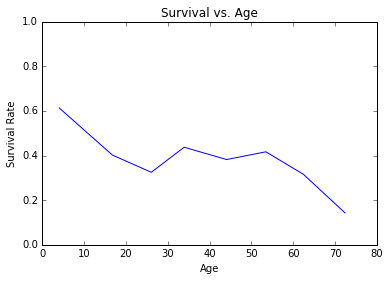

In [143]:
plot_group(data)
plt.title('Survival vs. Age')

Let's see what happens when I split on gender, and try the same plot again. Looking at these results, it's even more clear that age isn't a great predictor alone, and is much more telling when coupled with gender. Regardless of gender, young people tend to have higher survival rates, while it increases for females (interesting?) and decreases for males (makes sense) as age increases. Strange.

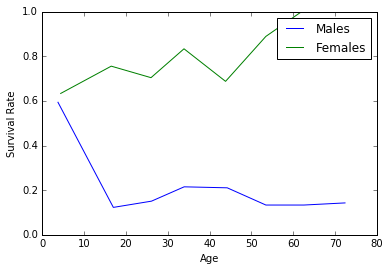

In [148]:
females = data[data.Sex == 'female']
males = data[data.Sex == 'male']

plot_group([males, females])
plt.legend(['Males', 'Females'])

Let's check something similar to the previous plot, but also split on class - richest and not richest. The results from this are as expected, poor males a

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,455.000000,455.000000,455.000000,352.000000,455.000000,455.000000,455.000000
mean,453.723077,0.140659,2.762637,27.698153,0.461538,0.224176,14.342196
std,260.481725,0.348052,0.425935,13.072495,1.160166,0.599438,12.867565
min,1.000000,0.000000,2.000000,0.420000,0.000000,0.000000,0.000000
25%,216.500000,0.000000,3.000000,20.000000,0.000000,0.000000,7.775000
50%,460.000000,0.000000,3.000000,26.000000,0.000000,0.000000,8.050000
75%,685.500000,0.000000,3.000000,34.000000,0.000000,0.000000,15.172900
max,891.000000,1.000000,3.000000,74.000000,8.000000,5.000000,73.500000


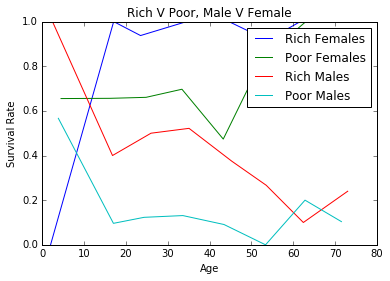

In [171]:
rich_females = data[(data.Sex == 'female') & (data.Pclass == 1)]
poor_females = data[(data.Sex == 'female') & (data.Pclass != 1)]

rich_males = data[(data.Sex == 'male') & (data.Pclass == 1)]
poor_males = data[(data.Sex == 'male') & (data.Pclass != 1)]

plot_group([rich_females, poor_females, rich_males, poor_males])

plt.legend(['Rich Females', 'Poor Females', 'Rich Males', 'Poor Males'])

plt.title('Rich V Poor, Male V Female')

Figured I'd also check to see if there's any correlation between the number of siblings and spouses on board and the survival rates. From this, it doesn't seem to be super significant. There might be something captured in families, but it will require more processing and analysis to figure out all of those relationships.

In [89]:
data.groupby(['SibSp']).mean()

,PassengerId,Survived,Pclass,Age,Parch,Fare
SibSp,,,,,,
0,455.370066,0.345395,2.351974,31.397558,0.185855,25.692028
1,439.727273,0.535885,2.057416,30.089727,0.655502,44.147370
2,412.428571,0.464286,2.357143,22.620000,0.642857,51.753718
3,321.562500,0.250000,2.562500,13.916667,1.312500,68.908862
4,381.611111,0.166667,3.000000,7.055556,1.500000,31.855556
5,336.800000,0.000000,3.000000,10.200000,2.000000,46.900000
8,481.714286,0.000000,3.000000,NaN,2.000000,69.550000


Here's a couple of graphs that show just how much correlation gender and class have to survival rates. As expected, there's an inverse relationship between class and overall survivability. 

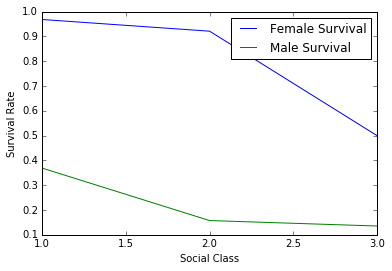

In [149]:
%matplotlib inline

females = data[data.Sex == 'female']
males = data[data.Sex == 'male']

plt.plot(females.groupby('Pclass').Survived.mean())
plt.plot(males.groupby('Pclass').Survived.mean())
plt.xlabel('Social Class')
plt.ylabel('Survival Rate')
plt.legend(['Female Survival', 'Male Survival'])
plt.show()

Out of curiosity, I'd also like to check and see what the distribution of prices paid looks like for the dataset. As it turns out, most people had pretty inexpensive tickets, while a few paid exorbitant amounts up to ~$500

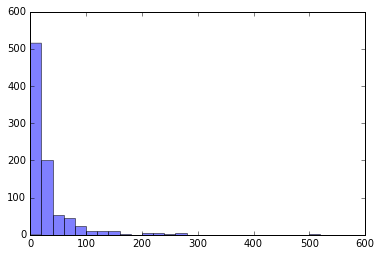

In [111]:
%matplotlib inline

plt.hist(data.Fare, bins=np.arange(0,600,20),alpha=0.5)
# plt.scatter(females.Fare, females.Survived)

# print males.Fare.value_counts().sort_index()

plt.show()